In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
from matplotlib.image import NonUniformImage

In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
# Set filepath
REPOSITORY='/home/ebb505/ARE_Project/are-logs/temp_1002/'
REPLICATE='morphoneuro_30_8_9-19-28-8624-1346062709/'
#REPLICATE='morphoneuro_23_8_15-21-58-8280-4219899454/'
#REPLICATE='morphoneuro_24_8_17-14-38-8090-2688345994/'
#REPLICATE='morphoneuro_25_8_14-30-19-9775-1275984018/'
#REPLICATE='morphoneuro_28_8_9-27-43-3191-1253811384/'
#REPLICATE='morphoneuro_28_8_9-21-38-8307-592090430/'
FILENAME='fitnesses.csv'
FILEPATH=REPOSITORY+REPLICATE+FILENAME
print('Filepath: ' + FILEPATH)

REPOSITORY='/home/ebb505/ARE_Project/genomes/20200929/lc_nsms_6_7_14-45-54-4728-3552986462/'
IDESCRIPTORS=REPOSITORY+'MD_Cart_WDH.csv'
IROBOTLIST=REPOSITORY+'CLRNrobotList.csv'

Filepath: /home/ebb505/ARE_Project/are-logs/temp_1002/morphoneuro_30_8_9-19-28-8624-1346062709/fitnesses.csv


In [3]:
# Import fitnesses
my_list = []
with open(FILEPATH, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_list.append(row[3:-1]) # Last character is empty for some reason
        
# Import descriptors
my_descriptors = []
with open(IDESCRIPTORS, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_descriptors.append(row[:-1]) # Last character is empty for some reason

# Import list
my_robotList = []
with open(IROBOTLIST, 'r') as csvfile:
    data = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in data:
        my_robotList.append(row[0]) # Last character is empty for some reason

In [4]:
# Estimate average for each generation
generations = len(my_list)
EVALUATIONS = len(my_list[0])
CTRLEVAL = 100

print("Population: ", EVALUATIONS, "Generations: ", generations)
dat = np.array([[float(y) for y in x] for x in my_list]) # Convert to array

descriptors = np.array([[float(y) for y in x] for x in my_descriptors]) # Convert to array
robotList = np.array([int(y) for y in my_robotList])
#robotList = np.array([[int(y) for y in x] for x in my_robotList])

Population:  10000 Generations:  1


In [5]:
datSort =[]
for i in range(int(EVALUATIONS/CTRLEVAL)):
    datSort.append(dat[0][(i*CTRLEVAL):(i*CTRLEVAL)+CTRLEVAL])    

In [6]:
robotMean = []
robotMedian = []
robotMax = []
for i in range(int(EVALUATIONS/CTRLEVAL)):
    robotMax.append(np.max(datSort[i]))
    #print(i)

In [7]:
# .91 - 0.25m
# 0.82 - 0.50m
# 0.735 - 0.75
temp = np.array([float(y) for y in robotMax])
print(len(temp[temp>0.735]))
print(len(temp[temp>0.82]))
print(len(temp[temp>0.91]))
print(temp[temp>0.91])


21
6
3
[0.937004 0.95386  0.915922]


FileNotFoundError: [Errno 2] No such file or directory: '/home/ebb505/ARE_Project/are-logs/MDPI/EvTrait/lc_nsms_6_7_14-45-54-4685-3170357486/morphoneuro_23_8_15-21-58-8280-4219899454/bootstrapViability.png'

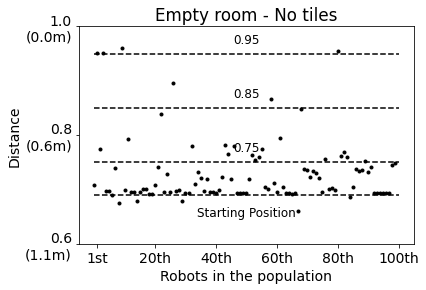

In [184]:
# Plot stuff
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)
#plt.title('Empty room')
plt.title('Empty room - No tiles')
plt.xlabel('Robots in the population')
plt.ylabel('Distance')
plt.plot(robotMax,'k.')
#plt.plot(robotMax,'k.', markersize=8)
plt.text(50, 0.97, '0.95', fontsize=12, horizontalalignment='center')
plt.plot([0,100],[0.95,0.95],'k--')
plt.text(50, 0.87, '0.85', fontsize=12, horizontalalignment='center')
plt.plot([0,100],[0.85,0.85],'k--')
plt.text(50, 0.77, '0.75', fontsize=12, horizontalalignment='center')
plt.plot([0,100],[0.75,0.75],'k--')
plt.text(50, 0.65, 'Starting Position', fontsize=12, horizontalalignment='center')
plt.plot([0,100],[0.69,0.69],'k--')
plt.ylim([0.6, 1.0])
#plt.yticks([0.4, 0.6, 0.8, 1.0], ['1.1', '1.7', '2.2', '2.83'])
plt.yticks([0.6, 0.8, 1.0], ['0.6\n(1.1m)', '0.8\n(0.6m)', '1.0\n(0.0m)'])
plt.xticks([1, 20, 40, 60, 80, 100], ['1st','20th', '40th', '60th', '80th', '100th'])
plt.savefig(REPOSITORY+REPLICATE+'bootstrapViability.png',dpi=200, bbox_inches='tight')

In [8]:
robotMaxArray = np.array([float(y) for y in robotMax])
temp = robotMaxArray>0.82
robotsPassing = []
for i in range(len(robotMax)):
    if(temp[i]):
        robotsPassing.append(i)

In [9]:
# print(robotsPassing)
# print(descriptors[robotList[robotsPassing[0]]])
robotsOrgans = []
for i in range(len(robotsPassing)):
    temp = []
    temp.append(descriptors[robotList[robotsPassing[i]],5] * 10 / 2)
    temp.append(descriptors[robotList[robotsPassing[i]],6] * 10 / 2)
    temp.append(descriptors[robotList[robotsPassing[i]],7] * 10 / 2)
    temp.append(descriptors[robotList[robotsPassing[i]],8] * 10 / 2)
    robotsOrgans.append(temp)
#     print(descriptors[robotList[robotsPassing[i]],5])
    #print(descriptors[robotList[robotsPassing[i]],6])
#print(robotsOrgans)
tempWheels = np.zeros(5)
tempSensors = np.zeros(5)
tempJoints = np.zeros(5)
tempCaster = np.zeros(5)
for i in range(len(robotsPassing)):
    for j in range(5):
        if(robotsOrgans[i][0] == j):
            tempWheels[j] = tempWheels[j] + 1
        if(robotsOrgans[i][1] == j):
            tempSensors[j] = tempSensors[j] + 1
        if(robotsOrgans[i][2] == j):
            tempJoints[j] = tempJoints[j] + 1
        if(robotsOrgans[i][3] == j):
            tempCaster[j] = tempCaster[j] + 1

In [10]:
print(robotList[robotsPassing])
print(robotsPassing)

[21574 20236  2648 20923  5446 18365]
[25, 62, 66, 90, 93, 95]


In [56]:
# Plot stuff
# https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html
font = {'weight' : 'normal',
        'size'   : 14.0}

plt.rc('font', **font)
plt.figure(0)

xedges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
yedges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
# 2-D histogram
# x = descriptors[robotList,5]
# y = descriptors[robotList,8]
# z = robotMax

x = descriptors[robotList[robotsPassing],5]
y = descriptors[robotList[robotsPassing],7]

#H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges), weights=robotMax)
H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.

#plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=plt.cm.get_cmap('cubehelix',100))
plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='cubehelix')

X, Y = np.meshgrid(xedges, yedges)
#ax.pcolormesh(X, Y, H)

#plt.colorbar()


#plt.imshow(H, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar(label='Robots')
#plt.clim(0, 40);


plt.xlabel('Wheels')
plt.ylabel('Joints')
plt.title('Empty room - No tiles - All ')
# plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9], ['0', '1', '2', '3', '4'])
# plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9], ['0', '1', '2', '3', '4'])
plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9], ['0', '1', '2', '3', '4'])
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9], ['0', '1', '2', '3', '4'])
plt.savefig(REPOSITORY+REPLICATE+'histogramAll.png',dpi=200, bbox_inches='tight')

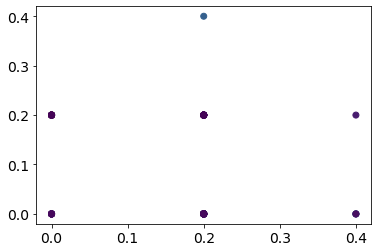

In [122]:
plt.scatter(x, y, c=z)